# OpenCV

## 이미지 읽어 들이기

In [2]:
# 이미지 다운로드
import urllib.request as req
url = "http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "test.png")

# OpenCV로 읽어들이기
import cv2
img = cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


### 이미지 인라인 출력하기

In [3]:
%matplotlib inline

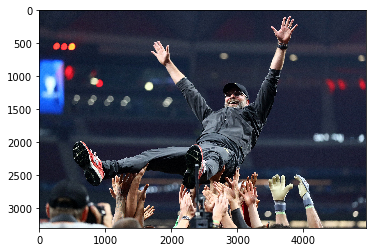

In [5]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

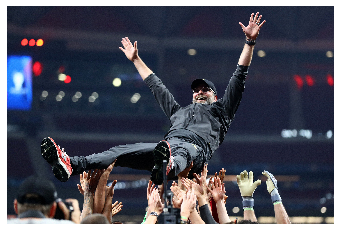

In [7]:
img = cv2.imread("test.jpg")
plt.axis("off") # axis 출력끄기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 저장하기

In [8]:
import cv2

# 이미지 읽어 들이기
img = cv2.imread("test.jpg")

# 이미지 저장하기
cv2.imwrite("out.png", img)

True

### 이미지 크기 변경

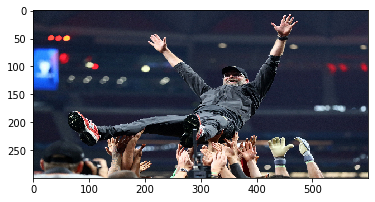

In [11]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("test.jpg")
# 이미지 크기 병경하기
im2 = cv2.resize(img, (600,300))
# 크기 변경한 이미지 저장하기
cv2.imwrite("out-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 자르기

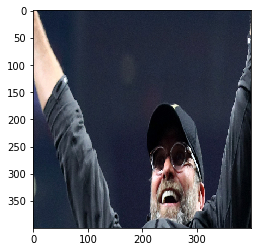

In [20]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("test.jpg")
# 이미지 자르기
im2 = img[800:1500, 2000:3500]
# 이미지 크기 변경하기
im2 = cv2.resize(im2, (400,400))
# 크기 변경한 이미지 저장하기
cv2.imwrite("cut-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()